# 순차 데이터와 순환 신경망

## 순차 데이터
- 순서에 의미가 있는 데이터(ex. 텍스트, 시계열 데이터)
- 피드포워드 신경망(FeedForward Neural Network, FFNN)
    - 순차 데이터에 맞는 신경망 X
    - 데이터의 흐름이 앞으로만 전달되는 신경망
    - 완전 연결 신경망 & 합성곱 신경망
- 다음 샘플을 위해서 이전 데이터가 신경망 층에 순환될 필요가 있음 -> **순환 신경망**

## 순환 신경망
- Recurrent Neural Network, RNN
- 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용
- Timestamp
    - 시퀀스 데이터를 처리할 때 RNN은 데이터를 시간의 흐름에 따라 하나씩 처리. 이때 각 시점마다의 데이터를 타임스텝이라고 함
    - 타임스텝이 오래될수록 순환되는 정보는 희미해짐
- Cell
    - 순환 신경망이 한 타임스텝에서 수행하는 연산 단위
    - 완전 연결 신경망과 달리 뉴런을 모두 표시하지 않고 하나의 셀로 층을 표현
    - 셀의 출력을 은닉 상태(hidden state)라고 함
- 활성화 함수로 tanh 함수를 많이 사용
- 순환 신경망은 가중치가 하나 더 있음 -> 이전 타임스텝의 은닉 상태에 곱해지는 가중치(첫번째 타임스텝에서는 0)

## 셀의 가중치와 입출력
- 하나의 샘플(한 문장)을 하나의 시퀀스라고 말함
- 시퀀스 안에는 여러 개의 아이템(여러 개의 단어)이 들어있음
- 시퀀스의 길이(단어의 개수)가 타임스텝 길이가 됨
- 하나의 샘플은 시퀀스 길이와 단어 표현의 2차원 배열 -> 순환층을 통과하면 1차원 배열로 바뀜(1차원 배열의 크기는 순환층의 뉴런 개수에 결정됨)

# 순환 신경망으로 IMDB 리뷰 분류하기

## IMDB 리뷰 데이터셋

In [1]:
from keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=200)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)

(25000,) (25000,)


In [3]:
# 텍스트 길이가 전부 다르기 때문에, 리뷰마다 별도의 파이썬 리스트로 담아야 메모리를 효율적으로 사용할 수 있음
print(len(train_input[0]))
print(len(train_input[1]))

218
189


In [4]:
# num_words=200으로 어휘 사전에는 200개의 단어만 들어가 있음. 어휘 사전에 없는 단어는 모두 2로 표시
# 0: 패딩, 1: 문장의 시작, 2: 어휘 사전에 없는 토큰
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 4, 173, 36, 2, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 2, 2, 5, 150, 4, 172, 112, 167, 2, 2, 2, 39, 4, 172, 2, 2, 17, 2, 38, 13, 2, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 2, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 2, 12, 8, 2, 8, 106, 5, 4, 2, 2, 16, 2, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 2, 28, 77, 52, 5, 14, 2, 16, 82, 2, 8, 4, 107, 117, 2, 15, 2, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 7, 4, 2, 2, 13, 104, 88, 4, 2, 15, 2, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 2, 22, 21, 134, 2, 26, 2, 5, 144, 30, 2, 18, 51, 36, 28, 2, 92, 25, 104, 4, 2, 65, 16, 38, 2, 88, 12, 16, 2, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [5]:
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [6]:
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [7]:
# 리뷰 길이의 평균값과 중간값
import numpy as np

lengths = np.array([len(x) for x in train_input])
print(np.mean(lengths), np.median(lengths))

239.00925 178.0


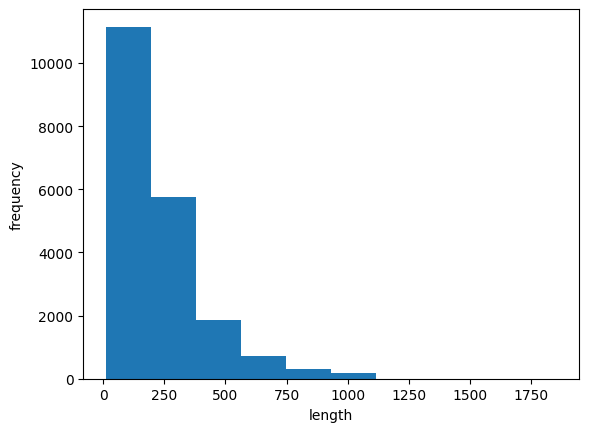

In [8]:
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [9]:
# 효율적인 배치 처리를 위해 시퀀스 길이를 통일해야 함
# 따라서 리뷰들의 길이를 100에 맞춤(숫자는 임의로 설정)
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)  # maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짧은 경우는 0으로 패딩
print(train_seq.shape)

(20000, 100)


In [10]:
print(train_seq[0])

[ 10   4  20   9   2   2   2   5  45   6   2   2  33   2   8   2 142   2
   5   2  17  73  17   2   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12   2  69   2 142  73   2   6
   2   7   2   2 188   2 103  14  31  10  10   2   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10   2 158]


In [11]:
print(train_input[0][-10:])  # 샘플의 앞부분이 잘림 -> 시퀀스 뒷부분의 정보가 더 유용하리라 기대하기 때문

[6, 2, 46, 7, 14, 20, 10, 10, 2, 158]


In [12]:
print(train_seq[5])  # 샘플의 앞부분에 패딩 추가 -> 시퀀스의 마지막에 있는 단어가 셀의 으닉 상태에 가장 큰 영향을 미치기 때문

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2   2   2 183  10
  10  13  82  79   4   2  36  71   2   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14   2  56 129   2  10  10  21   2  94   2   2   2   2  11 190
  24   2   2   7  94   2   2  10  10  87   2  34  49   2   7   2   2   2
   2   2   2   2  46  48  64  18   4   2]


In [13]:
val_seq = pad_sequences(val_input, maxlen=100)

## 순환 신경망 만들기

In [14]:
import keras

model = keras.Sequential()
model.add(keras.layers.Input(shape=(100,200)))  # 토큰을 정수로 변환한 데이터를 신경망에 주입하면 큰 정수는 큰 의미를 가짐(실제로는 X) -> 원-핫 인코딩 -> 200개의 단어를 표현하기 위해 배열의 길이가 200이어야만 함
model.add(keras.layers.SimpleRNN(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [15]:
train_oh = keras.utils.to_categorical(train_seq)  # 원-핫 인코딩
print(train_oh.shape)

(20000, 100, 200)


In [16]:
print(train_oh[0][0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]


In [17]:
val_oh = keras.utils.to_categorical(val_seq)

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 8)              │         1,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,681 (6.57 KB)

 Trainable params: 1,681 (6.57 KB)

 Non-trainable params: 0 (0.00 B)

## 순환 신경망 훈련하기

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.5097 - loss: 0.6982 - val_accuracy: 0.4924 - val_loss: 0.7060
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.5530 - loss: 0.6837 - val_accuracy: 0.6646 - val_loss: 0.6300
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.6720 - loss: 0.6177 - val_accuracy: 0.6898 - val_loss: 0.5970
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.7064 - loss: 0.5737 - val_accuracy: 0.7122 - val_loss: 0.5634
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 28ms/step - accuracy: 0.7248 - loss: 0.5541 - val_accuracy: 0.7234 - val_loss: 0.5564
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.7268 - loss: 0.5473 - val_accuracy: 0.7242 - val_loss: 0.5498
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.7293 - loss: 0.5498 - val_accuracy: 0.7256 - val_loss: 0.5473
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.7339 - loss: 0.5

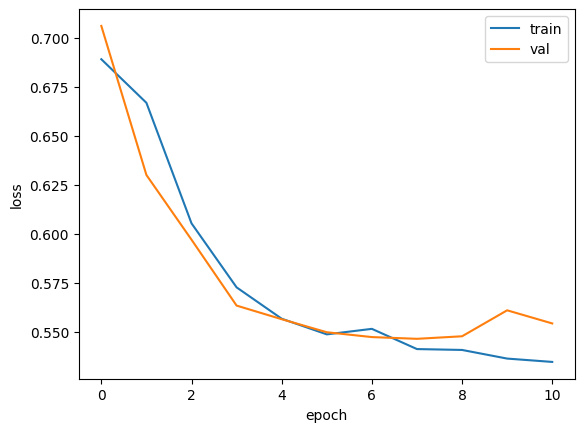

In [20]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [21]:
print(train_seq.nbytes, train_oh.nbytes)  # 원-핫 인코딩을 진행하면 데이터의 크기가 매우 커짐

8000000 3200000000


## 단어 임베딩을 사용하기

In [22]:
# 원-핫 인코딩에 비해 훨씬 작은 크기로 단어를 잘 표현할 수 있음
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [23]:
train_seq[0]

array([ 10,   4,  20,   9,   2, 364, 352,   5,  45,   6,   2,   2,  33,
       269,   8,   2, 142,   2,   5,   2,  17,  73,  17, 204,   5,   2,
        19,  55,   2,   2,  92,  66, 104,  14,  20,  93,  76,   2, 151,
        33,   4,  58,  12, 188,   2, 151,  12, 215,  69, 224, 142,  73,
       237,   6,   2,   7,   2,   2, 188,   2, 103,  14,  31,  10,  10,
       451,   7,   2,   5,   2,  80,  91,   2,  30,   2,  34,  14,  20,
       151,  50,  26, 131,  49,   2,  84,  46,  50,  37,  80,  79,   6,
         2,  46,   7,  14,  20,  10,  10, 470, 158], dtype=int32)

In [24]:
model_emb = keras.Sequential()
model_emb.add(keras.layers.Input(shape=(100,)))
model_emb.add(keras.layers.Embedding(500, 16))  # 500: 어휘사전의 크기, 16: 임베딩 벡터의 크기
model_emb.add(keras.layers.SimpleRNN(8))
model_emb.add(keras.layers.Dense(1, activation='sigmoid'))

In [25]:
model_emb.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 8)              │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model_emb.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_emb.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.6230 - loss: 0.6492 - val_accuracy: 0.7490 - val_loss: 0.5390
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7595 - loss: 0.5183 - val_accuracy: 0.7444 - val_loss: 0.5341
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.7831 - loss: 0.4725 - val_accuracy: 0.7810 - val_loss: 0.4820
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7845 - loss: 0.4658 - val_accuracy: 0.7428 - val_loss: 0.5124
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.7960 - loss: 0.4464 - val_accuracy: 0.7654 - val_loss: 0.4893
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - accuracy: 0.8056 - loss: 0.4356 - val_accuracy: 0.7658 - val_loss: 0.5020


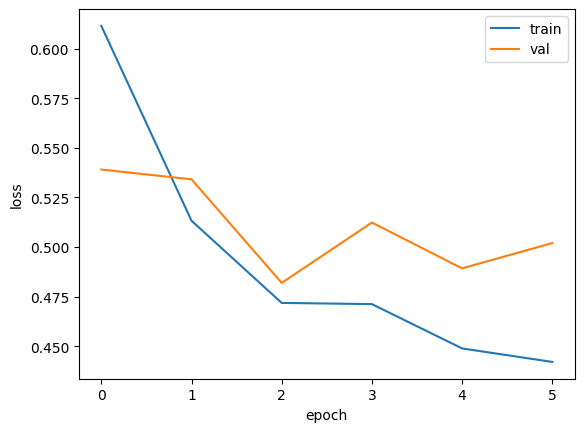

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## Pytorch

In [28]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [29]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [30]:
print(train_seq.shape, train_target.shape)

(20000, 100) (20000,)


In [31]:
# keras로 준비한 데이터를 사용하려면, pytorch 텐서로 변환
import torch

train_seq = torch.tensor(train_seq)
val_seq = torch.tensor(val_seq)

In [32]:
print(train_target.dtype)  # 파이토치 손실함수는 입력으로 실숫값을 기대 -> 실수형 텐서로 변환

int64


In [33]:
train_target = torch.tensor(train_target, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)
print(train_target.dtype)

torch.float32


In [34]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_seq, train_target)
val_dataset = TensorDataset(val_seq, val_target)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [35]:
import torch.nn as nn

class IMDBRnn(nn.Module):
    def __init__(self):
        super().__init__()                          # 부모 클래스의 생성자를 호출
        self.embedding = nn.Embedding(500, 16)      # 임베딩 층. 출력은 (배치 크기, 시퀀스 길이, 임베딩 크기)
        self.rnn = nn.RNN(16, 8, batch_first=True)  # 순환층. 파이토치의 순환층은 기본적으로 입력 차원의 순서가 (시퀀스 길이, 배치 크기, 임베딩 크기). 따라서 배치 차원이 맨 앞이라는 것을 알리기 위해 batch_first=True
        self.dense = nn.Linear(8, 1)                # 밀집층
        self.sigmoid = nn.Sigmoid()                 # 시그모이드 활성화 함수
    def forward(self, x):                 # 정방향 계산 담당
        x = self.embedding(x)
        _, hidden = self.rnn(x)           # nn.RNN 클래스는 마지막 층에서 나온 각 타임스텝의 은닉 상태와 모든 층의 최종 은닉 상태 두 개를 반환. 두 번째 값만 hidden에 저장해서 사용
        outputs = self.dense(hidden[-1])  # 여러 개의 층을 사용하는 경우를 가정하여 hidden[-1]로 마지막 층에 해당하는 은닉 상태 선택
        return self.sigmoid(outputs)

In [36]:
model = IMDBRnn()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

IMDBRnn(
  (embedding): Embedding(500, 16)
  (rnn): RNN(16, 8, batch_first=True)
  (dense): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [37]:
import torch.optim as optim

criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=2e-4)

In [38]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

epochs = 100
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            val_loss += loss.item()

    train_loss = train_loss/len(train_loader)
    val_loss = val_loss/len(val_loader)
    train_hist.append(train_loss)
    val_hist.append(val_loss)
    print(f"에포크:{epoch+1},",
          f"훈련 손실:{train_loss:.4f}, 검증 손실:{val_loss:.4f}")

    if best_loss == -1 or val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_rnn_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
            break

에포크:1, 훈련 손실:0.7047, 검증 손실:0.6998
에포크:2, 훈련 손실:0.6976, 검증 손실:0.6954
에포크:3, 훈련 손실:0.6943, 검증 손실:0.6934
에포크:4, 훈련 손실:0.6924, 검증 손실:0.6918
에포크:5, 훈련 손실:0.6909, 검증 손실:0.6908
에포크:6, 훈련 손실:0.6897, 검증 손실:0.6900
에포크:7, 훈련 손실:0.6886, 검증 손실:0.6893
에포크:8, 훈련 손실:0.6876, 검증 손실:0.6887
에포크:9, 훈련 손실:0.6866, 검증 손실:0.6877
에포크:10, 훈련 손실:0.6856, 검증 손실:0.6871
에포크:11, 훈련 손실:0.6846, 검증 손실:0.6861
에포크:12, 훈련 손실:0.6835, 검증 손실:0.6853
에포크:13, 훈련 손실:0.6823, 검증 손실:0.6844
에포크:14, 훈련 손실:0.6812, 검증 손실:0.6838
에포크:15, 훈련 손실:0.6799, 검증 손실:0.6829
에포크:16, 훈련 손실:0.6786, 검증 손실:0.6822
에포크:17, 훈련 손실:0.6771, 검증 손실:0.6810
에포크:18, 훈련 손실:0.6756, 검증 손실:0.6799
에포크:19, 훈련 손실:0.6741, 검증 손실:0.6790
에포크:20, 훈련 손실:0.6723, 검증 손실:0.6775
에포크:21, 훈련 손실:0.6705, 검증 손실:0.6764
에포크:22, 훈련 손실:0.6686, 검증 손실:0.6748
에포크:23, 훈련 손실:0.6667, 검증 손실:0.6735
에포크:24, 훈련 손실:0.6644, 검증 손실:0.6724
에포크:25, 훈련 손실:0.6621, 검증 손실:0.6708
에포크:26, 훈련 손실:0.6597, 검증 손실:0.6679
에포크:27, 훈련 손실:0.6570, 검증 손실:0.6658
에포크:28, 훈련 손실:0.6537, 검증 손실:0.6627
에포크:29, 훈련 손실:0.6502, 검증 손실:0

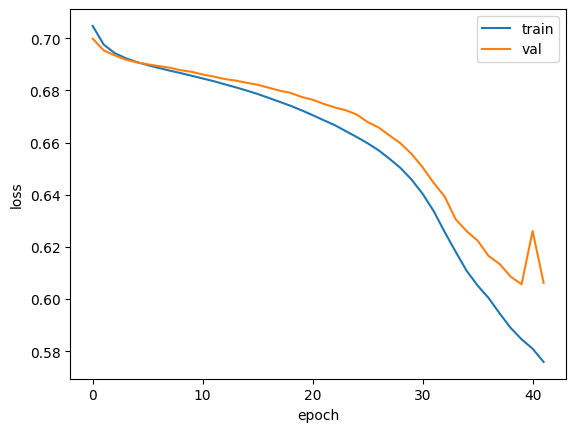

In [39]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [40]:
model.load_state_dict(torch.load('best_rnn_model.pt', weights_only=True))

model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = outputs > 0.5
        corrects += (predicts.squeeze() == targets).sum().item()

accuracy = corrects / len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.6808


# LSTM과 GRU

## LSTM 구조
- Long Short-Term Memory
- 단기 기억을 오래 기억하기 위해 고안

In [41]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [42]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [43]:
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_lstm.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.6251 - loss: 0.6426 - val_accuracy: 0.7798 - val_loss: 0.4798
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7787 - loss: 0.4803 - val_accuracy: 0.7956 - val_loss: 0.4478
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 47ms/step - accuracy: 0.8017 - loss: 0.4370 - val_accuracy: 0.7888 - val_loss: 0.4426
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.8048 - loss: 0.4208 - val_accuracy: 0.8032 - val_loss: 0.4263
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8157 - loss: 0.4084 - val_accuracy: 0.7892 - val_loss: 0.4485
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.8069 - loss: 0.4106 - val_accuracy: 0.7996 - val_loss: 0.4319
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.8189 - loss: 0.3990 - val_accuracy: 0.8016 - val_loss: 0.4311


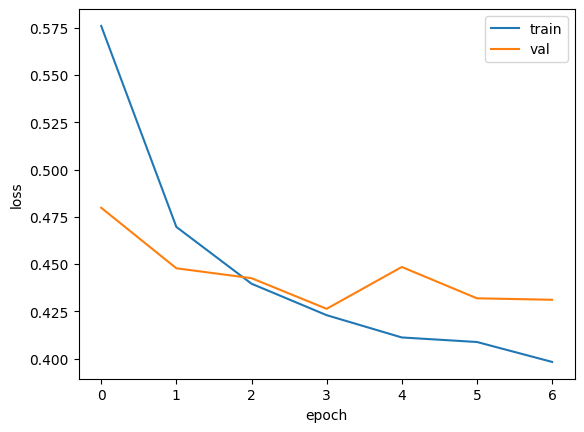

In [45]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 순환층에 드롭아웃 적용하기

In [46]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [47]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - accuracy: 0.6097 - loss: 0.6532 - val_accuracy: 0.7796 - val_loss: 0.4849
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7850 - loss: 0.4735 - val_accuracy: 0.7940 - val_loss: 0.4544
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - accuracy: 0.7953 - loss: 0.4482 - val_accuracy: 0.7842 - val_loss: 0.4582
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8038 - loss: 0.4333 - val_accuracy: 0.7990 - val_loss: 0.4339
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8090 - loss: 0.4141 - val_accuracy: 0.8024 - val_loss: 0.4333
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.8117 - loss: 0.4144 - val_accuracy: 0.7944 - val_loss: 0.4389
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8101 - loss: 0.4123 - val_accuracy: 0.7950 - val_loss: 0.4364
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8202 - loss: 0

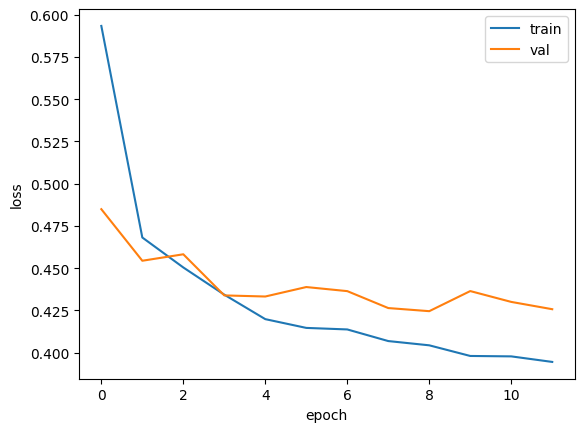

In [48]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## 2개의 층을 연결하기

In [49]:
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))  # 오직 마지막 순황층만 마지막 타임스텝의 은닉 상태를 출력해야 함 -> return_sequences=True를 통해 모든 타임스텝의 은닉 상태를 출력
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5877 - loss: 0.6496 - val_accuracy: 0.7664 - val_loss: 0.4911
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.7754 - loss: 0.4888 - val_accuracy: 0.7836 - val_loss: 0.4602
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7913 - loss: 0.4570 - val_accuracy: 0.7868 - val_loss: 0.4560
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 83ms/step - accuracy: 0.7975 - loss: 0.4370 - val_accuracy: 0.7724 - val_loss: 0.4656
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 87ms/step - accuracy: 0.7973 - loss: 0.4370 - val_accuracy: 0.7910 - val_loss: 0.4403
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 85ms/step - accuracy: 0.8085 - loss: 0.4216 - val_accuracy: 0.8042 - val_loss: 0.4245
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.8072 - loss: 0.4210 - val_accuracy: 0.8060 - val_loss: 0.4220
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 83ms/step - accuracy: 0.8136 - loss: 0

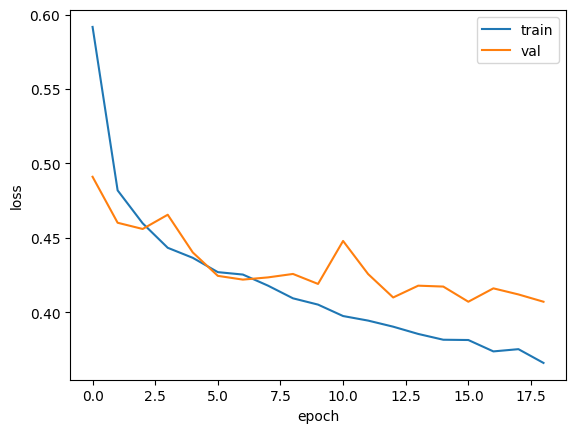

In [51]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

## GRU 구조
- Gated Recurrent Unit
- LSTM의 간소화 버전

In [52]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))
model_gru.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 8)              │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,633 (33.72 KB)

 Trainable params: 8,633 (33.72 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.5721 - loss: 0.6703 - val_accuracy: 0.7680 - val_loss: 0.4902
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.7738 - loss: 0.4798 - val_accuracy: 0.7872 - val_loss: 0.4549
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 58ms/step - accuracy: 0.7964 - loss: 0.4464 - val_accuracy: 0.7894 - val_loss: 0.4516
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 58ms/step - accuracy: 0.7997 - loss: 0.4413 - val_accuracy: 0.7964 - val_loss: 0.4386
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 61ms/step - accuracy: 0.8099 - loss: 0.4189 - val_accuracy: 0.7996 - val_loss: 0.4338
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 58ms/step - accuracy: 0.8117 - loss: 0.4145 - val_accuracy: 0.7938 - val_loss: 0.4373
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 58ms/step - accuracy: 0.8082 - loss: 0.4130 - val_accuracy: 0.8084 - val_loss: 0.4241
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 60ms/step - accuracy: 0.8172 - loss: 0

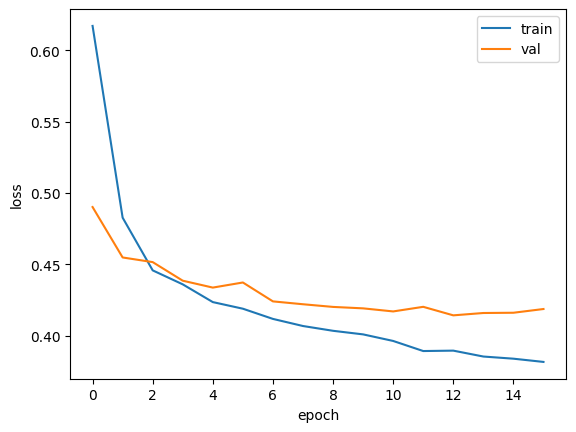

In [54]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [55]:
test_seq = pad_sequences(test_input, maxlen=100)
best_model = keras.models.load_model('best-gru-model.keras')
best_model.evaluate(test_seq, test_target)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8121 - loss: 0.4094


[0.4076324999332428, 0.8123199939727783]

## Pytorch

In [56]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [57]:
from keras.preprocessing.sequence import pad_sequences
import torch

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
train_seq = torch.tensor(train_seq)
val_seq = torch.tensor(val_seq)
train_target = torch.tensor(train_target, dtype=torch.float32)
val_target = torch.tensor(val_target, dtype=torch.float32)

In [58]:
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(train_seq, train_target)
val_dataset = TensorDataset(val_seq, val_target)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [59]:
import torch.nn as nn

class IMDBLstm(nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding = nn.Embedding(500, 16)
        self.lstm = nn.LSTM(16, 8, batch_first=True, num_layers=2, dropout=0.2)
        self.dense = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)  # nn.LSTM 클래스는 (마지막 층의 타임스텝별 은닉 상태, 모든 층의 마지막 은닉 상태, 모든 층의 마지막 셀 상태) 출력
        outputs = self.dense(hidden[-1])
        return self.sigmoid(outputs)

model = IMDBLstm()

In [60]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

IMDBLstm(
  (embedding): Embedding(500, 16)
  (lstm): LSTM(16, 8, num_layers=2, batch_first=True, dropout=0.2)
  (dense): Linear(in_features=8, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [61]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters())

In [62]:
train_hist = []
val_hist = []
patience = 2
best_loss = -1
early_stopping_counter = 0

epochs = 100
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            val_loss += loss.item()

    train_loss = train_loss/len(train_loader)
    val_loss = val_loss/len(val_loader)
    train_hist.append(train_loss)
    val_hist.append(val_loss)
    print(f"에포크:{epoch+1},",
          f"훈련 손실:{train_loss:.4f}, 검증 손실:{val_loss:.4f}")

    if best_loss == -1 or val_loss < best_loss:
        best_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), 'best_2lstm_model.pt')
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= patience:
            print(f"{epoch+1}번째 에포크에서 조기 종료되었습니다.")
            break

에포크:1, 훈련 손실:0.6908, 검증 손실:0.6800
에포크:2, 훈련 손실:0.6497, 검증 손실:0.6303
에포크:3, 훈련 손실:0.5955, 검증 손실:0.5737
에포크:4, 훈련 손실:0.5635, 검증 손실:0.5434
에포크:5, 훈련 손실:0.5285, 검증 손실:0.5311
에포크:6, 훈련 손실:0.5090, 검증 손실:0.5393
에포크:7, 훈련 손실:0.4974, 검증 손실:0.5031
에포크:8, 훈련 손실:0.4827, 검증 손실:0.5072
에포크:9, 훈련 손실:0.4677, 검증 손실:0.5030
에포크:10, 훈련 손실:0.4558, 검증 손실:0.4747
에포크:11, 훈련 손실:0.4521, 검증 손실:0.4729
에포크:12, 훈련 손실:0.4373, 검증 손실:0.4518
에포크:13, 훈련 손실:0.4251, 검증 손실:0.4535
에포크:14, 훈련 손실:0.4228, 검증 손실:0.4436
에포크:15, 훈련 손실:0.4157, 검증 손실:0.4476
에포크:16, 훈련 손실:0.4102, 검증 손실:0.4560
16번째 에포크에서 조기 종료되었습니다.


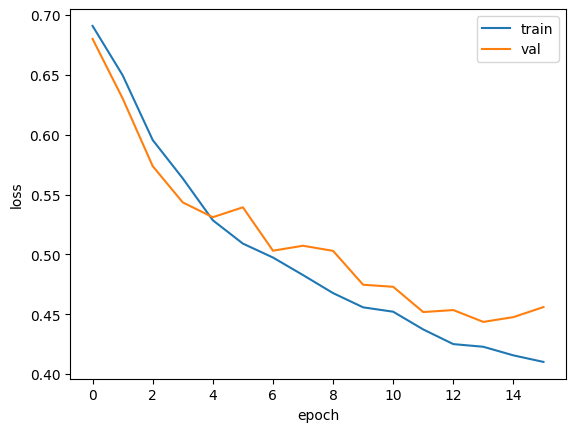

In [63]:
import matplotlib.pyplot as plt

plt.plot(train_hist, label='train')
plt.plot(val_hist, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [64]:
model.load_state_dict(torch.load('best_2lstm_model.pt', weights_only=True))

model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in val_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = outputs > 0.5
        corrects += (predicts.squeeze() == targets).sum().item()

accuracy = corrects / len(val_dataset)
print(f"검증 정확도: {accuracy:.4f}")

검증 정확도: 0.7950


In [65]:
test_seq = pad_sequences(test_input, maxlen=100)
test_seq = torch.tensor(test_seq)
test_target = torch.tensor(test_target, dtype=torch.float32)

test_dataset = TensorDataset(test_seq, test_target)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

model.eval()
corrects = 0
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs, targets = inputs.to(device), targets.to(device)
        outputs = model(inputs)
        predicts = outputs > 0.5
        corrects += (predicts.squeeze() == targets).sum().item()

accuracy = corrects / len(test_dataset)
print(f"테스트 정확도: {accuracy:.4f}")

테스트 정확도: 0.7936
